#### Paso 1: Importar las librerías necesarias
###### * Utilizamos pandas para manipulación de datos, matplotlib y seaborn para visualización.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### * Configurar estilo visual

###### Se puede elegir un sin fin de stilos pre-hechos para los gráficos este es uno que estuve probando
https://ggplot2.tidyverse.org/

In [2]:
plt.style.use("ggplot")

##### Paso 2: Cargar los datos
###### * Aquí cargamos los datos desde el archivo CSV para comenzar el análisis.

In [3]:
file_path = 'data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)

#### Paso 3: Inspección inicial de los datos
###### Exploramos las primeras filas para obtener una idea de la estructura y el contenido.


In [4]:
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###### Verificamos el tipo de cada columna y si hay valores faltantes para asegurar consistencia en los datos.


In [5]:
print("\nInformación general del dataset:")
display(df.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

None

#### Paso 4: Verificación de duplicados basados en el ID único de cliente
###### Verificamos que cada 'customerID' sea único en el dataset



In [6]:
duplicados = df['customerID'].duplicated().sum()
#Analisamos que si los datos para un customerID (CLIENTE) son repetidos entonces es un duplicado
if duplicados > 0:
    print(f"Advertencia: Se encontraron {duplicados} IDs de cliente duplicados.")
    # Opcionalmente, podríamos mostrar los registros duplicados para investigar más a fondo
    display(df[df.duplicated(subset='customerID', keep=False)])
else:
    print("customerID es único para cada entrada. No se encontraron duplicados.")

customerID es único para cada entrada. No se encontraron duplicados.


##### Paso 5: Búsqueda y tratamiento de valores nulos

In [7]:
# Identificamos las columnas que contienen valores nulos y la cantidad de nulos en cada una
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna antes del procesamiento:\n", valores_nulos[valores_nulos > 0])

# Relleno o tratamiento de valores nulos:
# - TotalCharges: Rellenamos los valores faltantes (nulos) con 0 asumiendo que los clientes nuevos no tienen cargos acumulados.
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)  # Reemplazamos espacios en blanco por NA
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)  # Convertimos a numérico y rellenamos nulos con 0

# Verificamos nuevamente los valores nulos después del procesamiento
valores_nulos = df.isnull().sum()
print("\nValores nulos por columna después del procesamiento:\n", valores_nulos[valores_nulos > 0])


Valores nulos por columna antes del procesamiento:
 Series([], dtype: int64)

Valores nulos por columna después del procesamiento:
 Series([], dtype: int64)


#### Paso 6: Conversión de tipos de datos para optimizar manipulación

In [8]:
# Convertimos columnas con valores "Yes"/"No" a booleanos y otras columnas a categóricas para optimizar el uso de memoria.

# Convertimos columnas booleanas
bool_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[bool_columns] = df[bool_columns] == 'Yes'  # Convierte 'Yes' a True y 'No' a False automáticamente

# Convertimos 'SeniorCitizen' a booleano donde 1 es True (senior) y 0 es False (no senior)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(bool)

# Convertimos columnas categóricas con valores limitados a tipo 'category' para optimizar
category_columns = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df[category_columns] = df[category_columns].astype('category')

# Convertimos columnas numéricas a tipos más eficientes (por ejemplo, 'int8' para valores pequeños)
# 'tenure' es la antigüedad en meses, por lo que puede ser convertida a un entero de 8 bits.
df['tenure'] = df['tenure'].astype('int8')

# 'MonthlyCharges' y 'TotalCharges' son valores monetarios, por lo que podemos usar float32 para optimizar memoria.
df['MonthlyCharges'] = df['MonthlyCharges'].astype('float32')
df['TotalCharges'] = df['TotalCharges'].astype('float32')

# Verificamos los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(df.dtypes)


Tipos de datos después de la conversión:
customerID            object
gender              category
SeniorCitizen           bool
Partner                 bool
Dependents              bool
tenure                  int8
PhoneService            bool
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling        bool
PaymentMethod       category
MonthlyCharges       float32
TotalCharges         float32
Churn                   bool
dtype: object


#### Paso 7: Detección de valores atípicos en columnas numéricas

In [9]:
# Paso 8: Detección de valores atípicos en columnas numéricas
# Identificamos valores extremos en 'tenure', 'MonthlyCharges' y 'TotalCharges' para revisar posibles outliers.
columnas_numericas = ['tenure', 'MonthlyCharges', 'TotalCharges']
valores_atipicos = {col: df[(df[col] < df[col].quantile(0.01)) | (df[col] > df[col].quantile(0.99))][col].unique() for col in columnas_numericas}
print("\nValores atípicos encontrados:\n", valores_atipicos)


Valores atípicos encontrados:
 {'tenure': array([0], dtype=int8), 'MonthlyCharges': array([ 18.95, 115.1 , 115.05,  19.15, 116.05, 116.25, 115.75, 115.6 ,
        19.  , 114.95, 115.8 , 116.1 ,  18.85,  18.7 , 115.55, 114.85,
        18.4 ,  18.8 , 115.65,  19.05, 116.45, 115.15, 116.85, 118.65,
       114.9 , 117.15, 116.75,  19.1 , 115.  , 116.  , 117.6 , 117.2 ,
        18.25, 118.6 , 115.5 , 115.25, 117.35, 116.8 , 118.75, 115.85,
       117.8 , 116.6 ,  18.75, 116.15, 117.45,  18.9 , 118.35, 116.5 ,
       114.75, 116.95, 116.4 , 118.2 , 116.2 , 116.3 , 116.55,  18.55,
       117.5 ], dtype=float32), 'TotalCharges': array([  19.45, 8129.3 , 8041.65,   19.25,   19.15, 8126.65,   19.6 ,
       8468.2 , 8404.9 ,    0.  , 8399.15, 8248.5 ,   19.55, 8220.4 ,
         19.  , 8071.05, 8306.05, 8196.4 , 8065.65, 8476.5 , 8310.55,
         19.65, 8046.85, 8333.95,   18.85, 8093.15, 8317.95, 8127.6 ,
         18.8 , 8375.05,   19.05, 8100.55,   19.5 , 8078.1 ,   19.2 ,
       8086.4 , 8477

#### Paso 9: Visualización univariada - Distribución de Cargos Mensuales

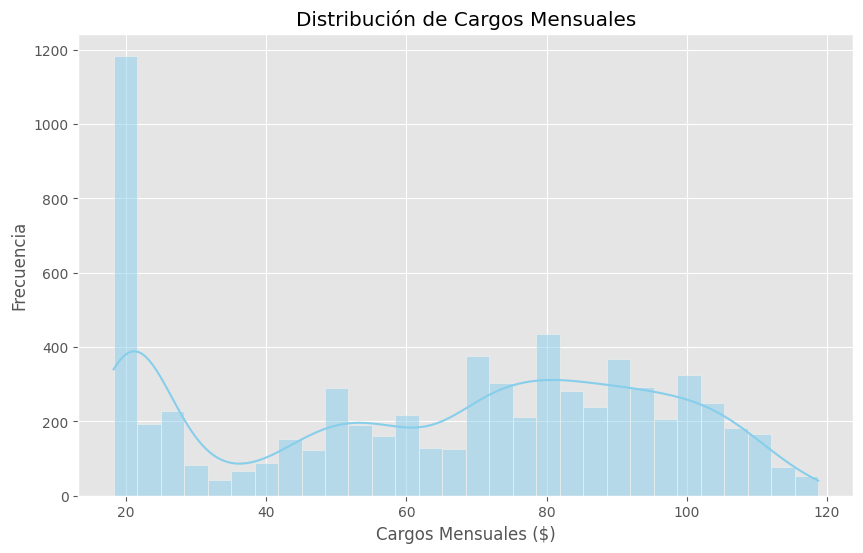

Interpretación: La mayoría de los clientes pagan entre $20 y $90 mensuales, con una concentración en el rango de $70 a $80.
Esto podría indicar que hay paquetes de servicio populares que establecen estos precios mensuales.


In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title("Distribución de Cargos Mensuales")
plt.xlabel("Cargos Mensuales ($)")
plt.ylabel("Frecuencia")
plt.show()
print('Interpretación: La mayoría de los clientes pagan entre $20 y $90 mensuales, con una concentración en el rango de $70 a $80.\nEsto podría indicar que hay paquetes de servicio populares que establecen estos precios mensuales.');

#### Paso 10: Visualización univariada - Distribución de Antigüedad

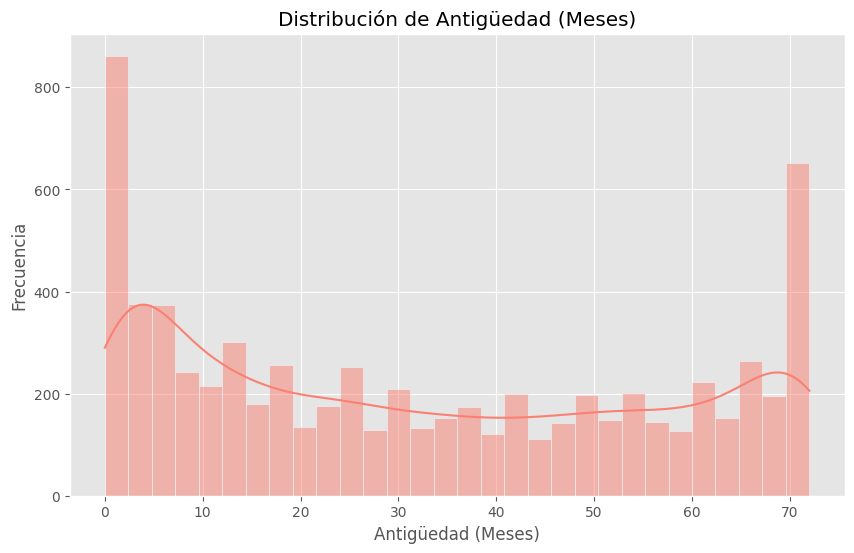

Interpretación: La antigüedad de los clientes muestra una concentración de valores bajos, lo que sugiere
 que muchos clientes son nuevos o tienen pocos meses con el servicio. Sin embargo, también hay un grupo significativo
de clientes con una antigüedad de 60 a 70 meses, mostrando retención en clientes de largo plazo.


In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='salmon')
plt.title("Distribución de Antigüedad (Meses)")
plt.xlabel("Antigüedad (Meses)")
plt.ylabel("Frecuencia")
plt.show()
print('Interpretación: La antigüedad de los clientes muestra una concentración de valores bajos, lo que sugiere\n que muchos clientes son nuevos o tienen pocos meses con el servicio. Sin embargo, también hay un grupo significativo\nde clientes con una antigüedad de 60 a 70 meses, mostrando retención en clientes de largo plazo.')

#### Paso 11: Visualización multivariada - Cargos Mensuales vs. Antigüedad según Estado de Rotación

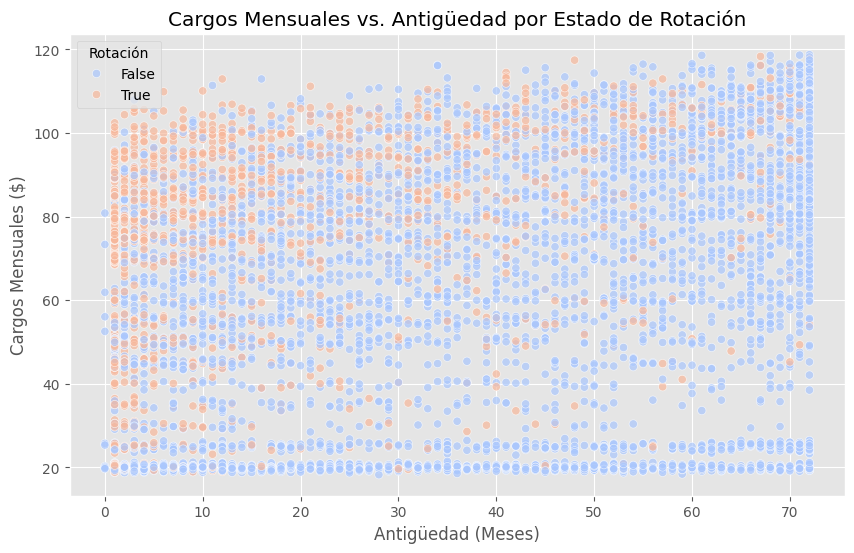

Interpretación: Los clientes con cargos mensuales altos (alrededor de $80) y una menor antigüedad (menos de 20 meses)
parecen tener una mayor probabilidad de rotación (Churn). Esto podría indicar que cargos altos en clientes nuevos
influyen en su decisión de abandonar el servicio.


In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title("Cargos Mensuales vs. Antigüedad por Estado de Rotación")
plt.xlabel("Antigüedad (Meses)")
plt.ylabel("Cargos Mensuales ($)")
plt.legend(title='Rotación')
plt.show()
print('Interpretación: Los clientes con cargos mensuales altos (alrededor de $80) y una menor antigüedad (menos de 20 meses)\nparecen tener una mayor probabilidad de rotación (Churn). Esto podría indicar que cargos altos en clientes nuevos\ninfluyen en su decisión de abandonar el servicio.')

#### Paso 12: Visualización multivariada - Tipo de Contrato y Estado de Rotación

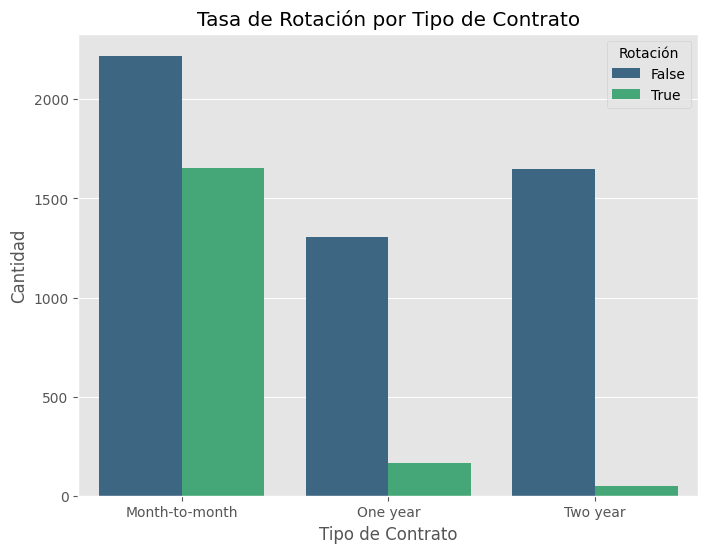

Interpretación: La rotación es significativamente más alta en clientes con contratos "Month-to-month".
Esto sugiere que los contratos mensuales ofrecen menor compromiso y, por tanto, mayor flexibilidad para dejar el servicio.
Los contratos a plazo (1 año o 2 años) parecen estar asociados con una menor rotación, posiblemente debido a un mayor compromiso.


In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette='viridis')
plt.title("Tasa de Rotación por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad")
plt.legend(title="Rotación")
plt.show()
print('Interpretación: La rotación es significativamente más alta en clientes con contratos "Month-to-month".\nEsto sugiere que los contratos mensuales ofrecen menor compromiso y, por tanto, mayor flexibilidad para dejar el servicio.\nLos contratos a plazo (1 año o 2 años) parecen estar asociados con una menor rotación, posiblemente debido a un mayor compromiso.')